<a href="https://colab.research.google.com/github/data-IA-2022/FAO_Sylvine_Evelyne/blob/main/FAO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Création de la base de données

In [ ]:
# Importer librairies
import numpy as np
import pandas as pd
import sqlite3
from glob import glob
from os import chdir, path
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
sns.set_theme(style="ticks")
from matplotlib.ticker import PercentFormatter

In [ ]:
# mount GoogleDrive and set the files path
from google.colab import drive
drive.mount('/content/drive')
%cd '/content/drive/MyDrive/Colab Notebooks'


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Colab Notebooks


In [ ]:
chdir('/content/drive/MyDrive/DATA IA Projet 1/')
fns = glob('FAOSTAT_2013_*.csv')
fns

['FAOSTAT_2013_animal.csv',
 'FAOSTAT_2013_cereal.csv',
 'FAOSTAT_2013_vegetal.csv',
 'FAOSTAT_2013_sous_alimentation.csv',
 'FAOSTAT_2013_population.csv']

In [ ]:
# Ouverture sqllite
conn = sqlite3.connect('bdd.sqlite')

In [ ]:
# Noms de colonnes à utiliser
names = ['Code Domaine', 'Domaine', 'Code Pays', 'Pays', 'Code Élément',
         'Élément', 'Code Produit', 'Produit', 'Code Année', 'Année', 'Unité',
         'Valeur', 'Symbole', 'Description du Symbole']

In [ ]:
# Lecture puis affichage des info taille des CSV, puis création des bdd
for fn in fns:
    fnshort = path.splitext(fn)[0]
    fnshort = fnshort.split('2013_')[1]
    df = pd.read_csv(fn, names=names, header=0)
    print(f"- {fn:50s} ({df.shape[0]:6d}, {df.shape[1]:2d})")
    df.to_sql(fnshort, con=conn, if_exists='replace')


- FAOSTAT_2013_animal.csv                            ( 37166, 14)


/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:2872: UserWarning:

The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.



- FAOSTAT_2013_cereal.csv                            ( 16057, 14)
- FAOSTAT_2013_vegetal.csv                           (104871, 14)
- FAOSTAT_2013_sous_alimentation.csv                 (   204, 14)
- FAOSTAT_2013_population.csv                        (   175, 14)


In [ ]:
# création d'un dataframe à partir de la bdd
SQL = '''
SELECT population."Code Pays", population.Pays, population.Valeur AS population, cereal.Valeur AS cereal
FROM population 
INNER JOIN cereal
ON (population."Code Pays" = cereal."Code Pays")
WHERE cereal.Élément="Production" AND cereal.Produit="Blé"
    AND cereal.Valeur>0
ORDER BY population."Code Pays"
; 
'''

df = pd.read_sql(SQL, conn)
df

,Code Pays,Pays,population,cereal
0,1,Armenia,2977,312.0
1,2,Afghanistan,30552,5169.0
2,3,Albania,3173,294.0
3,4,Algeria,39208,3299.0
4,7,Angola,21472,4.0
...,...,...,...,...
107,256,Luxembourg,530,91.0
108,272,Serbia,9511,2690.0
109,273,Montenegro,621,2.0
110,276,Sudan,37964,265.0


In [ ]:
#ajout des infos surface et continent dans le df
glob('*add.csv')

['FAOSTAT_continents_add.csv', 'FAOSTAT_area_add.csv']

In [ ]:
# rajouter les continents 
continents = pd.read_csv('FAOSTAT_continents_add.csv')
continents = continents[['name', 'region','sub-region']]
continents.head()

,name,region,sub-region
0,Afghanistan,Asia,Southern Asia
1,Åland Islands,Europe,Northern Europe
2,Albania,Europe,Southern Europe
3,Algeria,Africa,Northern Africa
4,American Samoa,Oceania,Polynesia


In [ ]:
df_continents = pd.merge(df, continents, how='inner', left_on='Pays', right_on='name')
df_continents.rename(columns = {'region': 'continent', 'sub-region' : 'sous-continent'}, inplace=True)
del df_continents["name"]
df_continents.head()

,Code Pays,Pays,population,cereal,continent,sous-continent
0,1,Armenia,2977,312.0,Asia,Western Asia
1,2,Afghanistan,30552,5169.0,Asia,Southern Asia
2,3,Albania,3173,294.0,Europe,Southern Europe
3,4,Algeria,39208,3299.0,Africa,Northern Africa
4,7,Angola,21472,4.0,Africa,Sub-Saharan Africa


In [ ]:
df_continents.shape

(104, 6)

## Importation des .csv sous forme de data frame et exploration des données

In [ ]:
chdir('/content/drive/MyDrive/DATA IA Projet 1/')
fns = glob('FAOSTAT_2013_*.csv')
fns

['FAOSTAT_2013_animal.csv',
 'FAOSTAT_2013_cereal.csv',
 'FAOSTAT_2013_vegetal.csv',
 'FAOSTAT_2013_sous_alimentation.csv',
 'FAOSTAT_2013_population.csv']

In [ ]:
# définir des noms pour les df
names = []
for i in fns:
  nom = i[13:-4]
  names.append(f"df_{nom}")    
print(names)  

['df_animal', 'df_cereal', 'df_vegetal', 'df_sous_alimentation', 'df_population']


In [ ]:
df_animal = pd.read_csv('FAOSTAT_2013_animal.csv')
df_cereal = pd.read_csv('FAOSTAT_2013_cereal.csv')
df_vegetal = pd.read_csv('FAOSTAT_2013_vegetal.csv')
df_sous_alimentation = pd.read_csv('FAOSTAT_2013_sous_alimentation.csv')
df_population = pd.read_csv('FAOSTAT_2013_population.csv')

# Analyses descriptives

###Exploration du dataframe animal

In [ ]:
# drop des colonnes superflues
animal_eda = df_animal[['Pays','Élément','Produit','Unité','Valeur']]
animal_eda

,Pays,Élément,Produit,Unité,Valeur
0,Afghanistan,Production,Viande de Bovins,Milliers de tonnes,134.00
1,Afghanistan,Importations - Quantité,Viande de Bovins,Milliers de tonnes,6.00
2,Afghanistan,Disponibilité intérieure,Viande de Bovins,Milliers de tonnes,140.00
3,Afghanistan,Nourriture,Viande de Bovins,Milliers de tonnes,140.00
4,Afghanistan,Disponibilité alimentaire en quantité (kg/pers...,Viande de Bovins,kg,4.59
...,...,...,...,...,...
37161,Chine,Nourriture,Plantes Aquatiques,Milliers de tonnes,13086.00
37162,Chine,Disponibilité alimentaire en quantité (kg/pers...,Plantes Aquatiques,kg,9.24
37163,Chine,Disponibilité alimentaire (Kcal/personne/jour),Plantes Aquatiques,Kcal/personne/jour,9.00
37164,Chine,Disponibilité de protéines en quantité (g/pers...,Plantes Aquatiques,g/personne/jour,0.69


In [ ]:
# Pivot table
animal_eda = animal_eda.pivot_table('Valeur', index=['Pays','Produit','Unité'], columns='Élément')
animal_eda.reset_index(inplace=True)
animal_eda.replace(np.nan, 0, inplace=True)
animal_eda

Élément,Pays,Produit,Unité,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,Kcal/personne/jour,0.0,0.0,5.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Afghanistan,Abats Comestible,Milliers de tonnes,0.0,0.0,0.0,0.00,0.0,0.00,53.0,0.0,0.0,53.0,0.0,53.0,0.0,0.0,0.0
2,Afghanistan,Abats Comestible,g/personne/jour,0.0,0.0,0.0,0.00,0.2,0.77,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Afghanistan,Abats Comestible,kg,0.0,0.0,0.0,1.72,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,"Beurre, Ghee",Kcal/personne/jour,0.0,0.0,23.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14903,Îles Salomon,Viande de Volailles,kg,0.0,0.0,0.0,3.34,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14904,Îles Salomon,"Viande, Autre",Kcal/personne/jour,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14905,Îles Salomon,"Viande, Autre",Milliers de tonnes,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14906,Îles Salomon,"Viande, Autre",g/personne/jour,0.0,0.0,0.0,0.00,0.0,0.04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Est-ce qu'on a tous les produits pour chaque pays ?

In [ ]:
animal_eda.groupby('Pays')['Produit'].count().sort_values(ascending = False) 

Pays
Chili            92
Canada           92
Pérou            92
Mexique          88
Maurice          88
                 ..
Mali             76
Guinée-Bissau    72
Tadjikistan      69
Soudan           56
Afghanistan      44
Name: Produit, Length: 175, dtype: int64

Plus de 80 produits pour la grande majorité des pays.

{'whiskers': [<matplotlib.lines.Line2D at 0x7fb5037c56d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fb5037c5d90>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fb5037c5370>],
 'medians': [<matplotlib.lines.Line2D at 0x7fb5037bd490>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fb5037bd790>],
 'means': []}

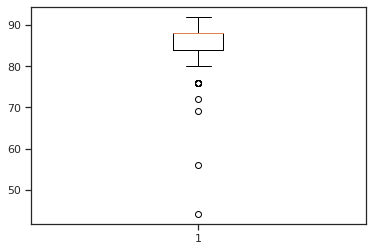

In [ ]:
# Tendance centrale et dispersion
plt.boxplot(animal_eda.groupby('Pays')['Produit'].count())

Disponibilité alimentaire par pays




In [ ]:
animal_eda.groupby('Pays')['Disponibilité alimentaire (Kcal/personne/jour)'].sum().sort_values(ascending = False) 

Pays
Islande                     1497.0
Chine - RAS de Hong-Kong    1316.0
Finlande                    1313.0
Danemark                    1194.0
France                      1183.0
                             ...  
Nigéria                      104.0
Mozambique                   103.0
Libéria                      101.0
Togo                          93.0
Rwanda                        63.0
Name: Disponibilité alimentaire (Kcal/personne/jour), Length: 175, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x7fb501454190>,
 'caps': [<matplotlib.lines.Line2D at 0x7fb501454850>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fb501446df0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fb501454f10>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fb5033d8250>],
 'means': []}

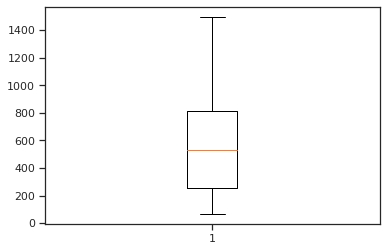

In [ ]:
# Tendance centrale et dispersion
plt.boxplot(animal_eda.groupby('Pays')['Disponibilité alimentaire (Kcal/personne/jour)'].sum())

Analyses bivariées

In [ ]:
# Merge par pays 
disp_alim = animal_eda.groupby('Pays', as_index=False)['Disponibilité alimentaire (Kcal/personne/jour)'].sum()
disp_prot = animal_eda.groupby('Pays', as_index=False)['Disponibilité de protéines en quantité (g/personne/jour)'].sum()
disp_mg = animal_eda.groupby('Pays', as_index=False)['Disponibilité de matière grasse en quantité (g/personne/jour)'].sum()
production = animal_eda.groupby('Pays', as_index=False)['Production'].sum()
importations = animal_eda.groupby('Pays', as_index=False)['Importations - Quantité'].sum()
merged = disp_alim.merge(disp_prot,on='Pays').merge(disp_mg,on='Pays').merge(production,on='Pays').merge(importations,on='Pays')
merged

Élément,Pays,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité de matière grasse en quantité (g/personne/jour),Production,Importations - Quantité
0,Afghanistan,216.0,12.21,15.23,2280.0,350.0
1,Afrique du Sud,487.0,36.39,34.66,7614.0,1049.0
2,Albanie,985.0,59.41,67.72,1355.0,87.0
3,Algérie,378.0,24.98,22.36,4395.0,2731.0
4,Allemagne,1042.0,61.49,77.99,43621.0,14711.0
...,...,...,...,...,...,...
170,Émirats arabes unis,557.0,41.70,34.16,412.0,2781.0
171,Équateur,614.0,36.50,45.16,4295.0,250.0
172,États-Unis d'Amérique,984.0,69.77,67.69,154474.0,12365.0
173,Éthiopie,124.0,7.69,8.01,5195.0,17.0


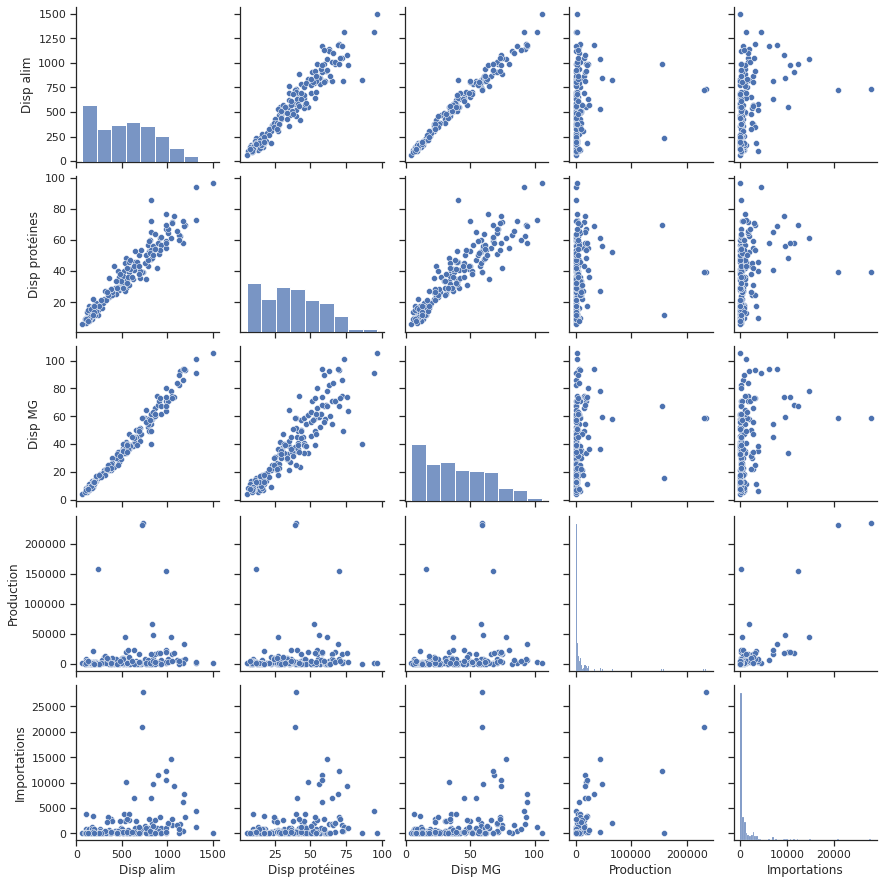

In [ ]:
merged.columns = ['Pays', 'Disp alim', 'Disp protéines', 'Disp MG', 'Production', 'Importations']
sns.pairplot(merged)

In [ ]:
merged.corr()

,Disp alim,Disp protéines,Disp MG,Production,Importations
Disp alim,1.000000,0.955514,0.988439,0.135487,0.293070
Disp protéines,0.955514,1.000000,0.911123,0.091954,0.269625
Disp MG,0.988439,0.911123,1.000000,0.159195,0.316065
Production,0.135487,0.091954,0.159195,1.000000,0.758818
Importations,0.293070,0.269625,0.316065,0.758818,1.000000


A côté des corrélations logiques, il y en a une qui paraît moins intuitive : plus on produit et plus on importe (coefficient de Pearson supérieur à 0.7).

###Exploration du dataframe cereal

In [ ]:
# drop des colonnes superflues
cereal_eda = df_cereal[['Pays','Élément','Produit','Unité','Valeur']]
cereal_eda

,Pays,Élément,Produit,Unité,Valeur
0,Afghanistan,Production,Blé,Milliers de tonnes,5169.00
1,Afghanistan,Importations - Quantité,Blé,Milliers de tonnes,1173.00
2,Afghanistan,Variation de stock,Blé,Milliers de tonnes,-350.00
3,Afghanistan,Disponibilité intérieure,Blé,Milliers de tonnes,5992.00
4,Afghanistan,Semences,Blé,Milliers de tonnes,322.00
...,...,...,...,...,...
16052,Chine,Nourriture,"Céréales, Autres",Milliers de tonnes,405.00
16053,Chine,Disponibilité alimentaire en quantité (kg/pers...,"Céréales, Autres",kg,0.29
16054,Chine,Disponibilité alimentaire (Kcal/personne/jour),"Céréales, Autres",Kcal/personne/jour,2.00
16055,Chine,Disponibilité de protéines en quantité (g/pers...,"Céréales, Autres",g/personne/jour,0.06


In [ ]:
# Pivot table
cereal_eda = cereal_eda.pivot_table('Valeur', index=['Pays','Produit','Unité'], columns='Élément')
cereal_eda.reset_index(inplace=True)
cereal_eda.replace(np.nan, 0, inplace=True)
cereal_eda

Élément,Pays,Produit,Unité,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Blé,Kcal/personne/jour,0.0,0.0,1369.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Afghanistan,Blé,Milliers de tonnes,0.0,0.0,0.0,0.00,0.00,0.00,5992.0,0.0,1173.0,4895.0,775.0,5169.0,322.0,0.0,-350.0
2,Afghanistan,Blé,g/personne/jour,0.0,0.0,0.0,0.00,4.69,36.91,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Afghanistan,Blé,kg,0.0,0.0,0.0,160.23,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,"Céréales, Autres",Kcal/personne/jour,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5270,Îles Salomon,Riz (Eq Blanchi),Kcal/personne/jour,0.0,0.0,623.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5271,Îles Salomon,Riz (Eq Blanchi),Milliers de tonnes,0.0,12.0,0.0,0.00,0.00,0.00,49.0,0.0,47.0,36.0,1.0,3.0,0.0,0.0,0.0
5272,Îles Salomon,Riz (Eq Blanchi),g/personne/jour,0.0,0.0,0.0,0.00,1.36,10.90,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5273,Îles Salomon,Riz (Eq Blanchi),kg,0.0,0.0,0.0,63.76,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Est-ce qu'on a tous les produits pour chaque pays ?

In [ ]:
cereal_eda.groupby('Pays')['Produit'].count().sort_values(ascending = False) 

Pays
Japon                                         36
Chine, continentale                           36
République populaire démocratique de Corée    36
Chine                                         36
Ghana                                         36
                                              ..
Îles Salomon                                  21
Émirats arabes unis                           21
Turkménistan                                  20
Viet Nam                                      18
Timor-Leste                                   15
Name: Produit, Length: 175, dtype: int64

Au moins 30 produits pour une majorité des pays.

{'whiskers': [<matplotlib.lines.Line2D at 0x7fb502e12b50>,
 'caps': [<matplotlib.lines.Line2D at 0x7fb502e12100>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fb502e0d880>],
 'medians': [<matplotlib.lines.Line2D at 0x7fb5033d08e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fb502df36a0>],
 'means': []}

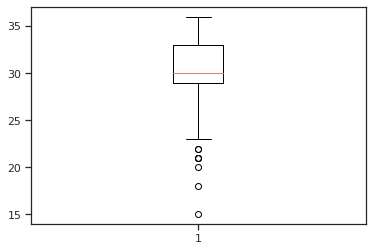

In [ ]:
# Tendance centrale et dispersion
plt.boxplot(cereal_eda.groupby('Pays')['Produit'].count())

Disponibilité alimentaire par pays

In [ ]:
cereal_eda.groupby('Pays')['Disponibilité alimentaire (Kcal/personne/jour)'].sum().sort_values(ascending = False) 

Pays
Égypte                       2214.0
Maroc                        1960.0
Lesotho                      1934.0
Bangladesh                   1870.0
Mali                         1862.0
                              ...  
Ouganda                       593.0
Congo                         539.0
Samoa                         519.0
République centrafricaine     451.0
Rwanda                        387.0
Name: Disponibilité alimentaire (Kcal/personne/jour), Length: 175, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x7fb502d08be0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fb502d132e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fb502d08880>],
 'medians': [<matplotlib.lines.Line2D at 0x7fb502d139a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fb502d13ca0>],
 'means': []}

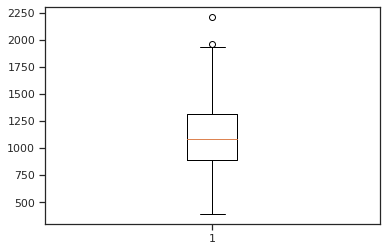

In [ ]:
# Tendance centrale et dispersion
plt.boxplot(cereal_eda.groupby('Pays')['Disponibilité alimentaire (Kcal/personne/jour)'].sum())

Analyses bivariées

In [ ]:
# Merge par pays 
disp_alim = cereal_eda.groupby('Pays', as_index=False)['Disponibilité alimentaire (Kcal/personne/jour)'].sum()
disp_prot = cereal_eda.groupby('Pays', as_index=False)['Disponibilité de protéines en quantité (g/personne/jour)'].sum()
disp_mg = cereal_eda.groupby('Pays', as_index=False)['Disponibilité de matière grasse en quantité (g/personne/jour)'].sum()
production = cereal_eda.groupby('Pays', as_index=False)['Production'].sum()
importations = cereal_eda.groupby('Pays', as_index=False)['Importations - Quantité'].sum()
var_stock = cereal_eda.groupby('Pays', as_index=False)['Variation de stock'].sum()
semences = cereal_eda.groupby('Pays', as_index=False)['Semences'].sum()
pertes = cereal_eda.groupby('Pays', as_index=False)['Pertes'].sum()
merged = disp_alim.merge(disp_prot,on='Pays').merge(disp_mg,on='Pays').merge(production,on='Pays').merge(importations,on='Pays').merge(var_stock,on='Pays').merge(semences,on='Pays').merge(pertes,on='Pays')
merged

Élément,Pays,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité de matière grasse en quantité (g/personne/jour),Production,Importations - Quantité,Variation de stock,Semences,Pertes
0,Afghanistan,1560.0,41.04,5.52,6350.0,1303.0,-350.0,363.0,883.0
1,Afrique du Sud,1538.0,41.09,10.20,14155.0,3147.0,1969.0,73.0,500.0
2,Albanie,1144.0,35.49,6.08,703.0,468.0,-22.0,22.0,91.0
3,Algérie,1678.0,49.33,6.79,4914.0,10279.0,-180.0,253.0,1024.0
4,Allemagne,872.0,26.39,3.48,47757.0,11093.0,28.0,1027.0,1221.0
...,...,...,...,...,...,...,...,...,...
170,Émirats arabes unis,1379.0,34.21,5.66,55.0,4249.0,-543.0,0.0,384.0
171,Équateur,812.0,18.85,3.12,2598.0,877.0,-15.0,39.0,138.0
172,États-Unis d'Amérique,801.0,23.70,3.63,433686.0,13477.0,-37854.0,3098.0,222.0
173,Éthiopie,1362.0,36.69,6.06,22646.0,1055.0,-3397.0,385.0,1168.0


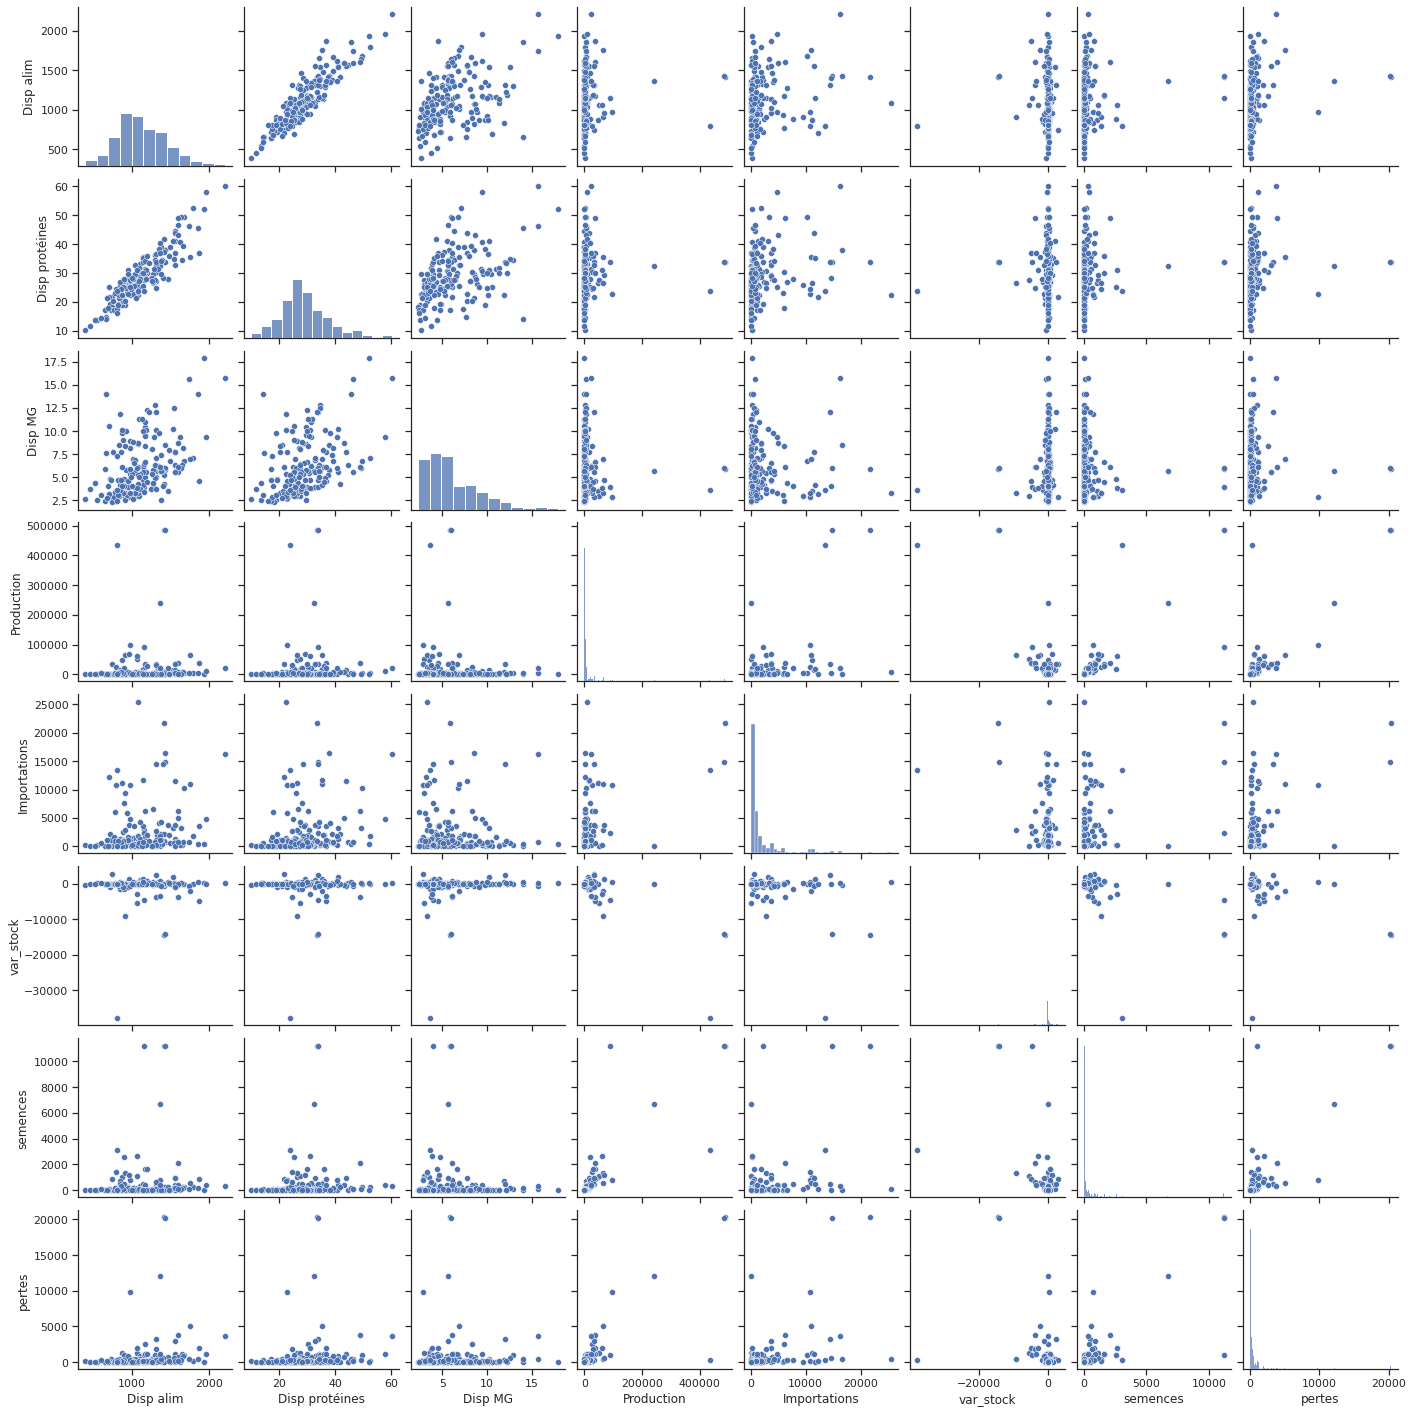

In [ ]:
merged.columns = ['Pays', 'Disp alim', 'Disp protéines', 'Disp MG', 'Production', 'Importations', 'var_stock', 'semences', 'pertes']
sns.pairplot(merged)

In [ ]:
merged.corr()

,Disp alim,Disp protéines,Disp MG,Production,Importations,var_stock,semences,pertes
Disp alim,1.000000,0.905184,0.439133,0.087267,0.223529,-0.004270,0.112172,0.221205
Disp protéines,0.905184,1.000000,0.455872,0.066737,0.216177,-0.005726,0.119114,0.152115
Disp MG,0.439133,0.455872,1.000000,-0.073871,-0.034641,0.107811,-0.078394,0.006675
Production,0.087267,0.066737,-0.073871,1.000000,0.476369,-0.792123,0.822400,0.825753
Importations,0.223529,0.216177,-0.034641,0.476369,1.000000,-0.338856,0.356910,0.479661
var_stock,-0.004270,-0.005726,0.107811,-0.792123,-0.338856,1.000000,-0.510038,-0.383107
semences,0.112172,0.119114,-0.078394,0.822400,0.356910,-0.510038,1.000000,0.783107
pertes,0.221205,0.152115,0.006675,0.825753,0.479661,-0.383107,0.783107,1.000000


Pour les céréales, il n'y a pas de corrélation forte entre la production et les importations.

En moyenne, la corrélation entre la production et les pertes est moins importante pour les céréales que pour les végétaux (voir plus bas).





Ratio Pertes/Production

In [ ]:
production = cereal_eda.groupby('Produit', as_index=False)['Production'].sum()
pertes = cereal_eda.groupby('Produit', as_index=False)['Pertes'].sum()
merged = production.merge(pertes,on='Produit')
merged.query('Production != 0', inplace=True)
merged['Ratio Pertes/Production (en %)'] = round(merged['Pertes']/merged['Production']*100, 2)
merged.sort_values(by='Ratio Pertes/Production (en %)', ascending=False)

Élément,Produit,Production,Pertes,Ratio Pertes/Production (en %)
4,Millet,30656.0,2354.0,7.68
6,Riz (Eq Blanchi),632320.0,33784.0,5.34
8,Sorgho,65011.0,2924.0,4.50
3,Maïs,1235653.0,50996.0,4.13
1,Blé,830374.0,30540.0,3.68
7,Seigle,17361.0,589.0,3.39
5,Orge,144161.0,4828.0,3.35
2,"Céréales, Autres",29661.0,838.0,2.83
0,Avoine,24430.0,544.0,2.23


In [ ]:
merged['Ratio Pertes/Production (en %)'].describe() 

count    9.000000
mean     4.125556
std      1.614846
min      2.230000
25%      3.350000
50%      3.680000
75%      4.500000
max      7.680000
Name: Ratio Pertes/Production (en %), dtype: float64

In [ ]:
fig = px.bar(merged.sort_values(by='Ratio Pertes/Production (en %)', ascending=False), x="Ratio Pertes/Production (en %)", y="Produit", title="Pertes par produit")
fig.show()

La production de millet étant le plus souvent autoconsommée, il semble crucial d'améliorer les infrastructures pour augmenter la disponibilité alimentaire.

###Exploration du dataframe vegetal

In [ ]:
# drop des colonnes superflues
vegetal_eda = df_vegetal[['Pays','Élément','Produit','Unité','Valeur']]
vegetal_eda

,Pays,Élément,Produit,Unité,Valeur
0,Afghanistan,Production,Blé,Milliers de tonnes,5169.00
1,Afghanistan,Importations - Quantité,Blé,Milliers de tonnes,1173.00
2,Afghanistan,Variation de stock,Blé,Milliers de tonnes,-350.00
3,Afghanistan,Disponibilité intérieure,Blé,Milliers de tonnes,5992.00
4,Afghanistan,Semences,Blé,Milliers de tonnes,322.00
...,...,...,...,...,...
104866,Chine,Disponibilité de protéines en quantité (g/pers...,Aliments pour enfants,g/personne/jour,0.04
104867,Chine,Disponibilité de matière grasse en quantité (g...,Aliments pour enfants,g/personne/jour,0.01
104868,Chine,Disponibilité alimentaire (Kcal/personne/jour),Miscellanees,Kcal/personne/jour,0.00
104869,Chine,Disponibilité de protéines en quantité (g/pers...,Miscellanees,g/personne/jour,0.01


In [ ]:
# Pivot table
vegetal_eda = vegetal_eda.pivot_table('Valeur', index=['Pays','Produit','Unité'], columns='Élément')
vegetal_eda.reset_index(inplace=True)
vegetal_eda.replace(np.nan, 0, inplace=True)
vegetal_eda

Élément,Pays,Produit,Unité,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,"Agrumes, Autres",Kcal/personne/jour,0.0,0.0,1.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Afghanistan,"Agrumes, Autres",Milliers de tonnes,0.0,0.0,0.0,0.00,0.00,0.00,41.0,2.0,40.0,39.0,2.0,3.0,0.0,0.0,0.0
2,Afghanistan,"Agrumes, Autres",g/personne/jour,0.0,0.0,0.0,0.00,0.01,0.02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Afghanistan,"Agrumes, Autres",kg,0.0,0.0,0.0,1.29,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,Aliments pour enfants,Kcal/personne/jour,0.0,0.0,1.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42083,Îles Salomon,Vin,kg,0.0,0.0,0.0,0.07,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
42084,Îles Salomon,"Épices, Autres",Kcal/personne/jour,0.0,0.0,4.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
42085,Îles Salomon,"Épices, Autres",Milliers de tonnes,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
42086,Îles Salomon,"Épices, Autres",g/personne/jour,0.0,0.0,0.0,0.00,0.21,0.15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Est-ce qu'on a tous les produits pour chaque pays ?

In [ ]:
vegetal_eda.groupby('Pays')['Produit'].count().sort_values(ascending = False)

Pays
Chine                                         282
Japon                                         274
Népal                                         273
Arabie saoudite                               271
République-Unie de Tanzanie                   271
                                             ... 
Tadjikistan                                   153
Timor-Leste                                   150
République populaire démocratique de Corée    149
Lesotho                                       122
Turkménistan                                  117
Name: Produit, Length: 175, dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x7fb500d9eb20>,
 'caps': [<matplotlib.lines.Line2D at 0x7fb500cbf460>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fb500d9eca0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fb500cbfb20>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fb500cbfe20>],
 'means': []}

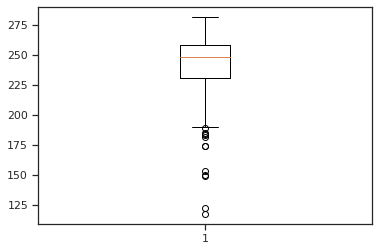

In [ ]:
plt.boxplot(vegetal_eda.groupby('Pays')['Produit'].count())

Disponibilité alimentaire par pays

In [ ]:
vegetal_eda.groupby('Pays')['Disponibilité alimentaire (Kcal/personne/jour)'].sum().sort_values(ascending = False) 

Pays
Égypte                             3188.0
Turquie                            3141.0
Maroc                              3071.0
Tunisie                            2971.0
Algérie                            2915.0
                                    ...  
Bolivie (État plurinational de)    1790.0
Équateur                           1732.0
Mongolie                           1679.0
République centrafricaine          1673.0
Antigua-et-Barbuda                 1635.0
Name: Disponibilité alimentaire (Kcal/personne/jour), Length: 175, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x7fb500c209a0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fb500beb0a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fb500c20640>],
 'medians': [<matplotlib.lines.Line2D at 0x7fb500beb760>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fb500beba60>],
 'means': []}

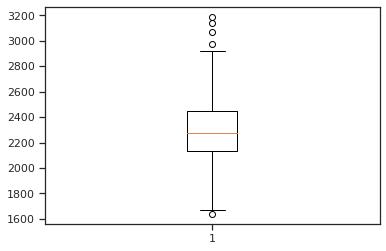

In [ ]:
# Tendance centrale et dispersion
plt.boxplot(vegetal_eda.groupby('Pays')['Disponibilité alimentaire (Kcal/personne/jour)'].sum())

Sachant que le besoin calorique pour une personne avoisine 2000 Kcal/jour, cela signifie que les végétaux à eux seuls sont capables de couvrir ce besoin dans une majorité de pays.

Analyse bivariée

In [ ]:
# Merge par pays 
disp_alim = vegetal_eda.groupby('Pays', as_index=False)['Disponibilité alimentaire (Kcal/personne/jour)'].sum()
disp_prot = vegetal_eda.groupby('Pays', as_index=False)['Disponibilité de protéines en quantité (g/personne/jour)'].sum()
disp_mg = vegetal_eda.groupby('Pays', as_index=False)['Disponibilité de matière grasse en quantité (g/personne/jour)'].sum()
production = vegetal_eda.groupby('Pays', as_index=False)['Production'].sum()
importations = vegetal_eda.groupby('Pays', as_index=False)['Importations - Quantité'].sum()
var_stock = vegetal_eda.groupby('Pays', as_index=False)['Variation de stock'].sum()
semences = vegetal_eda.groupby('Pays', as_index=False)['Semences'].sum()
pertes = vegetal_eda.groupby('Pays', as_index=False)['Pertes'].sum()
merged = disp_alim.merge(disp_prot,on='Pays').merge(disp_mg,on='Pays').merge(production,on='Pays').merge(importations,on='Pays').merge(var_stock,on='Pays').merge(semences,on='Pays').merge(pertes,on='Pays')
merged

Élément,Pays,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité de matière grasse en quantité (g/personne/jour),Production,Importations - Quantité,Variation de stock,Semences,Pertes
0,Afghanistan,1871.0,46.05,18.27,8891.0,2638.0,-368.0,393.0,1072.0
1,Afrique du Sud,2533.0,48.94,48.92,55649.0,6468.0,1912.0,186.0,2110.0
2,Albanie,2203.0,51.96,38.76,2609.0,846.0,-45.0,55.0,182.0
3,Algérie,2915.0,66.94,54.12,21964.0,14672.0,-479.0,428.0,3587.0
4,Allemagne,2461.0,39.90,63.63,110926.0,50642.0,-247.0,1475.0,3717.0
...,...,...,...,...,...,...,...,...,...
170,Émirats arabes unis,2718.0,62.81,53.00,780.0,12546.0,-376.0,0.0,675.0
171,Équateur,1732.0,24.80,49.48,20042.0,1475.0,555.0,125.0,654.0
172,États-Unis d'Amérique,2698.0,39.65,93.68,740194.0,69522.0,-37242.0,9030.0,6937.0
173,Éthiopie,2005.0,52.70,17.88,40907.0,1694.0,-2857.0,635.0,2125.0


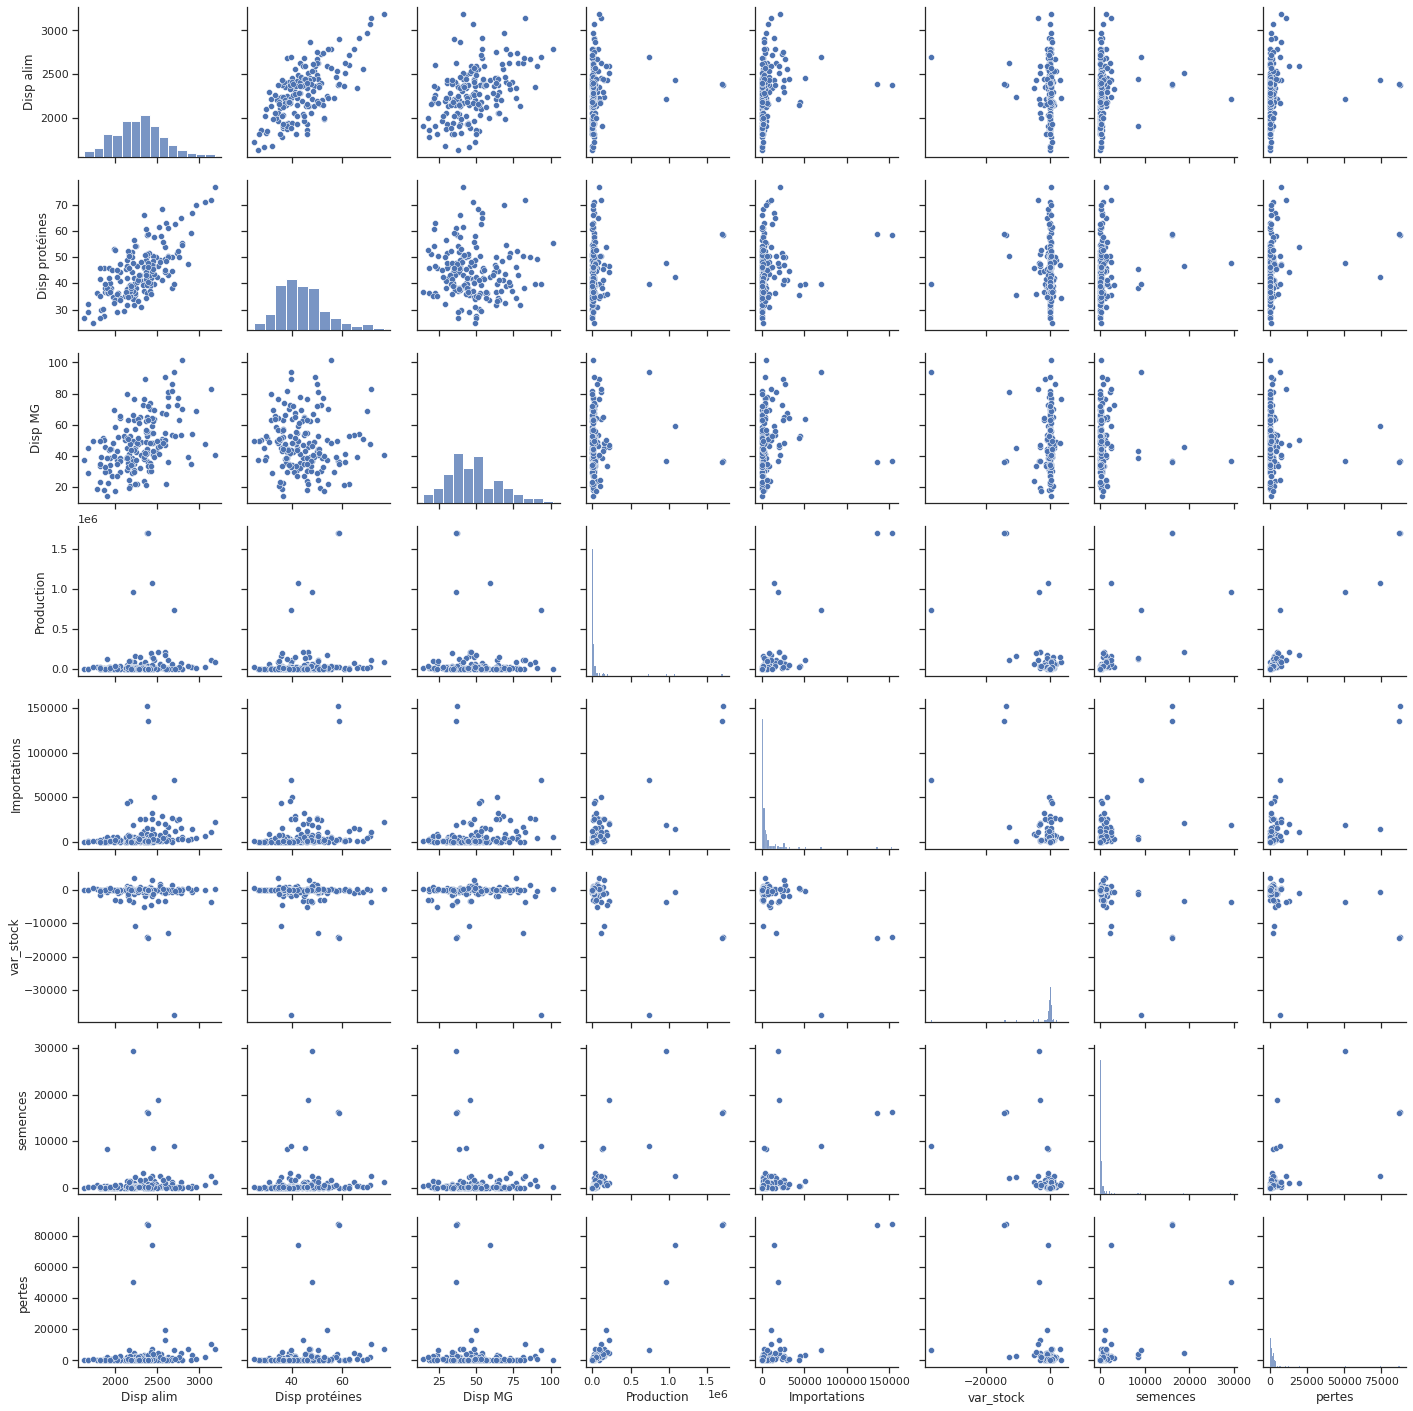

In [ ]:
merged.columns = ['Pays', 'Disp alim', 'Disp protéines', 'Disp MG', 'Production', 'Importations', 'var_stock', 'semences', 'pertes']
sns.pairplot(merged)

In [ ]:
merged.corr()

,Disp alim,Disp protéines,Disp MG,Production,Importations,var_stock,semences,pertes
Disp alim,1.000000,0.681617,0.445956,0.107781,0.213115,-0.138041,0.086215,0.114412
Disp protéines,0.681617,1.000000,-0.042045,0.146446,0.183824,-0.068999,0.123496,0.186802
Disp MG,0.445956,-0.042045,1.000000,0.004678,0.141666,-0.142208,-0.017200,-0.039718
Production,0.107781,0.146446,0.004678,1.000000,0.823103,-0.588116,0.746147,0.961461
Importations,0.213115,0.183824,0.141666,0.823103,1.000000,-0.581044,0.562545,0.740494
var_stock,-0.138041,-0.068999,-0.142208,-0.588116,-0.581044,1.000000,-0.462678,-0.398078
semences,0.086215,0.123496,-0.017200,0.746147,0.562545,-0.462678,1.000000,0.664963
pertes,0.114412,0.186802,-0.039718,0.961461,0.740494,-0.398078,0.664963,1.000000


Pour les végétaux, les pertes sont aussi corrélées aux importations.




Ratio Pertes/Production

In [ ]:
production = vegetal_eda.groupby('Produit', as_index=False)['Production'].sum()
pertes = vegetal_eda.groupby('Produit', as_index=False)['Pertes'].sum()
merged = production.merge(pertes,on='Produit')
merged.query('Production != 0', inplace=True)
merged['Ratio Pertes/Production (en %)'] = round(merged['Pertes']/merged['Production']*100, 2)
merged.sort_values(by='Ratio Pertes/Production (en %)', ascending=False)

Élément,Produit,Production,Pertes,Ratio Pertes/Production (en %)
60,"Racines, Nda",20969.0,3357.0,16.01
6,Bananes,118117.0,17836.0,15.10
41,Manioc,259602.0,30675.0,11.82
7,Bananes plantains,28778.0,3222.0,11.20
3,Ananas,26050.0,2858.0,10.97
...,...,...,...,...
17,Edulcorants Autres,26387.0,0.0,0.00
1,"Alcool, non Comestible",20963.0,0.0,0.00
10,Boissons Alcooliques,35710.0,0.0,0.00
43,Miel,2151.0,0.0,0.00


In [ ]:
merged['Ratio Pertes/Production (en %)'].describe() 

count    73.000000
mean      3.875479
std       3.858275
min       0.000000
25%       0.250000
50%       3.350000
75%       5.360000
max      16.010000
Name: Ratio Pertes/Production (en %), dtype: float64

In [ ]:
fig = px.bar(merged.sort_values(by='Ratio Pertes/Production (en %)', ascending=False), x="Ratio Pertes/Production (en %)", y="Produit", title="Pertes par produit")
fig.show()

En plus d'être riches en calories, les huiles semblent moins soumises aux pertes, ce qui les rend doublement intéressantes à produire.

###Exploration du dataframe population

In [ ]:
# drop des colonnes superflues
df_population = df_population[['Country Code','Country','Element','Unit','Value']]
# renommer la colonne Value en population dans le df population
df_population.rename(columns = {'Value': 'population'}, inplace=True)
df_population

# description des variables restantes
df_population.describe()

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5039: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Country Code,population
count,175.000000,1.750000e+02
mean,126.720000,4.807996e+04
std,75.168519,1.786327e+05
min,1.000000,5.400000e+01
25%,64.500000,2.543500e+03
50%,121.000000,9.413000e+03
75%,188.500000,2.888150e+04
max,351.000000,1.416667e+06


####Scatterplot production blé selon population

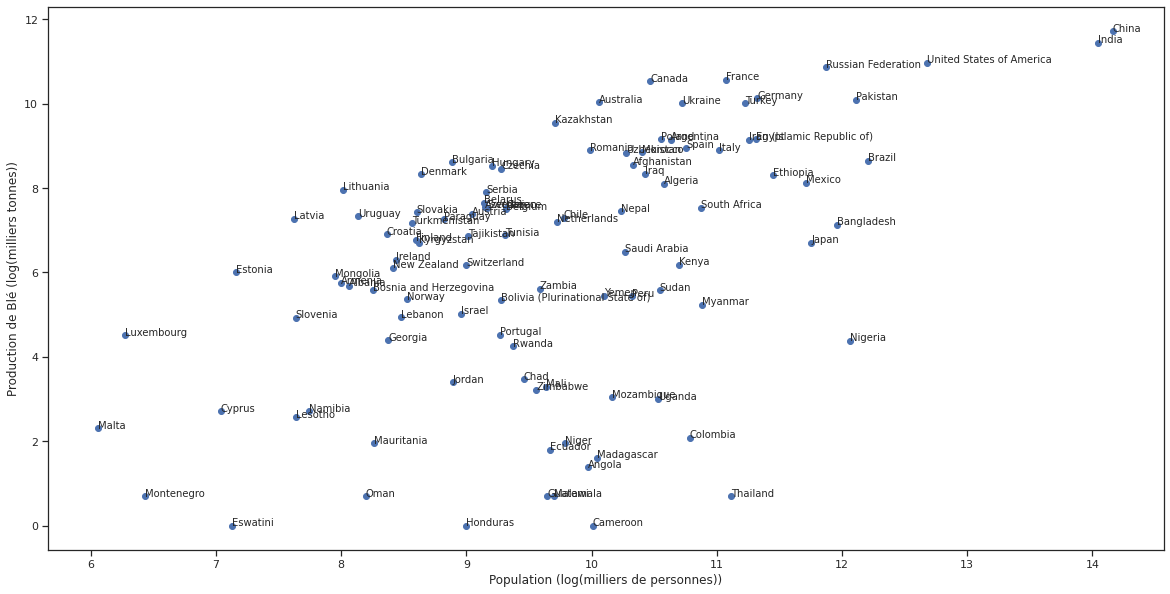

In [ ]:
# conversion des variables pour meilleure représentation graphique
x = np.log(df_continents['population'])
y = np.log(df_continents['cereal'])

plt.figure(figsize=(20, 10))
plt.scatter(x, y) # le graph

plt.xlabel("Population (log(milliers de personnes))") # label axe x
plt.ylabel("Production de Blé (log(milliers tonnes))") #label axe y

# Ajout des labels pour chaque ligne (coordonnées en LOG)
for i,x in df_continents.iterrows():
    plt.annotate(x['Pays'],
                 (np.log(x['population']), np.log(x['cereal'])),
                 fontsize=10)

# Affichage
plt.show()

####Pareto population

In [ ]:
# associer une couleur à un continent
print(df_continents.continent.unique())

# dictionnaire continent-couleur
color_code = { 
'Asia' : 'tab:blue',
'Americas' : 'tab:orange',
'Africa' : 'tab:green',
'Europe' : 'tab:red',
'Oceania' : 'tab:purple'
}

# fonction associe continent à couleur 
def associate_color(x):
  col = color_code.get(x)
  return(col)

# nouvelle colonne contenant couleur
df_continents['couleur'] = df_continents['continent'].apply(associate_color)

df_continents.shape # 104 lignes

['Asia' 'Europe' 'Africa' 'Americas' 'Oceania']


(104, 7)

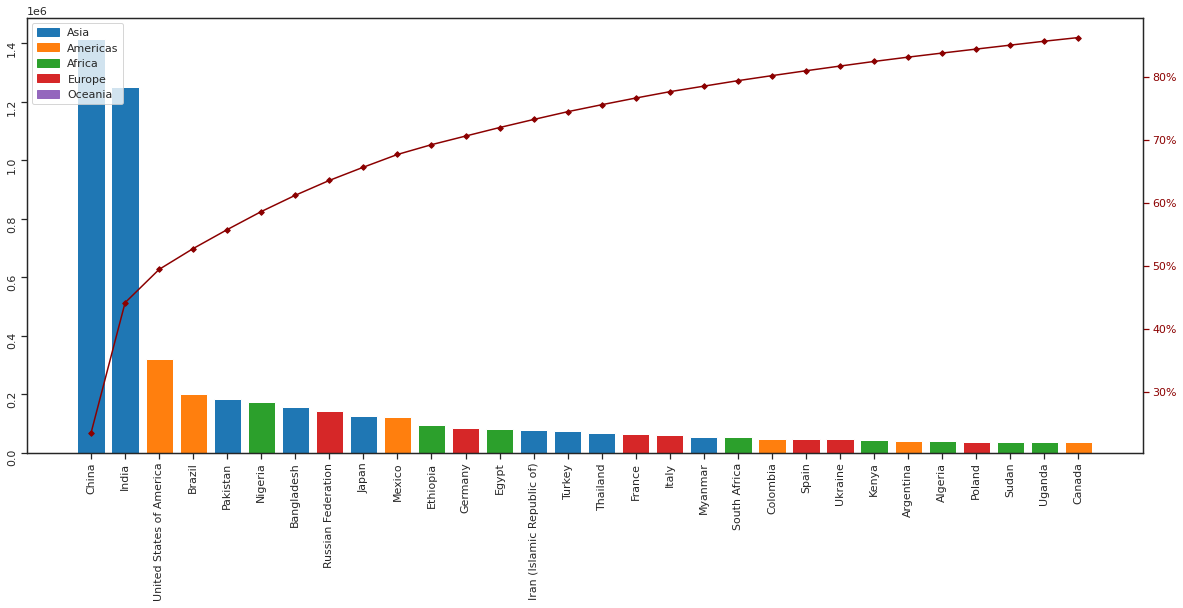

In [ ]:
df_continents_sort = df_continents.sort_values(by='population', ascending=False)

# créer colonne avec pourcentage cumulé
df_continents_sort['cumperc'] = df_continents_sort['population'].cumsum()/df_continents_sort['population'].sum()*100

# créer barplot
fig, ax = plt.subplots(figsize=(20,8))
ax.bar('Pays', 'population',data=df_continents_sort[:30], color=df_continents_sort['couleur'])

# plot pourcentage cumulé
ax2 = ax.twinx()
ax2.plot('Pays', 'cumperc', color="darkred", marker="D", ms=4, data= df_continents_sort[:30])
ax2.yaxis.set_major_formatter(PercentFormatter())

#changer couleurs axes
ax2.tick_params(axis='y', colors="darkred")

# faire tourner labels
ax.tick_params(labelrotation=90)


# légende couleurs      
labels = list(color_code.keys())
handles = [plt.Rectangle((0,0),1,1, color=color_code[label]) for label in labels]
plt.legend(handles, labels)

###Exploration du dataframe sous_alimentation

In [ ]:
print(df_sous_alimentation.shape)
print(df_sous_alimentation.columns)
df_sous_alimentation.head()

(204, 14)
Index(['Code Domaine', 'Domaine', 'Code zone', 'Zone', 'Code Élément',
       'Élément', 'Code Produit', 'Produit', 'Code année', 'Année', 'Unité',
       'Valeur', 'Symbole', 'Description du Symbole'],
      dtype='object')


,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
0,FS,Données de la sécurité alimentaire,2,Afghanistan,6132,Valeur,21001,Nombre de personnes sous-alimentées (millions)...,20122014,2012-2014,millions,8.1,F,Estimation FAO
1,FS,Données de la sécurité alimentaire,202,Afrique du Sud,6132,Valeur,21001,Nombre de personnes sous-alimentées (millions)...,20122014,2012-2014,millions,2.6,F,Estimation FAO
2,FS,Données de la sécurité alimentaire,3,Albanie,6132,Valeur,21001,Nombre de personnes sous-alimentées (millions)...,20122014,2012-2014,millions,0.2,F,Estimation FAO
3,FS,Données de la sécurité alimentaire,4,Algérie,6132,Valeur,21001,Nombre de personnes sous-alimentées (millions)...,20122014,2012-2014,millions,1.8,F,Estimation FAO
4,FS,Données de la sécurité alimentaire,79,Allemagne,6132,Valeur,21001,Nombre de personnes sous-alimentées (millions)...,20122014,2012-2014,millions,NaN,<2,Moins de 2 millions de personnes sont sous-ali...


In [ ]:
# drop des colonnes inutiles
df_sous_alimentation = df_sous_alimentation[['Code zone','Zone','Élément','Produit','Unité','Valeur']]
# description des variables restantes
df_sous_alimentation.describe()

,Code zone,Valeur
count,204.000000,97.000000
mean,129.264706,9.041237
std,76.765836,28.889361
min,1.000000,0.100000
25%,62.500000,0.500000
50%,127.500000,1.800000
75%,193.250000,6.100000
max,351.000000,213.100000


#2. Etude guidée

##Question 1 : calcul population mondiale

In [ ]:
# Population mondiale - Résultat préliminaire
df_population['population'].sum() * 1000

8413993000

In [ ]:
# Ce nombre est bien supérieur aux sept milliards prévus.
df_population.query('Country in ("China, Hong Kong SAR", "China, Macao SAR","China, mainland","China, Taiwan Province of", "China")')

,Country Code,Country,Element,Unit,population
32,96,"China, Hong Kong SAR",Total Population - Both sexes,1000 persons,7204
33,128,"China, Macao SAR",Total Population - Both sexes,1000 persons,566
34,41,"China, mainland",Total Population - Both sexes,1000 persons,1385567
35,214,"China, Taiwan Province of",Total Population - Both sexes,1000 persons,23330
174,351,China,Total Population - Both sexes,1000 persons,1416667


In [ ]:
# Pour respecter l'indépendance politique de Taïwan et Hong Kong, on supprime le pays unifié "China".
df_population.query('Country != "China"', inplace=True)

In [ ]:
# Population mondiale
df_population['population'].sum() * 1000

6997326000

##Question 2 : redondance

**Equation permettant de décrire la relation entre les 11 quantités:**

Disponibilité intérieure
=
Production + Importations  + Variation - Exportation
=
Aliments pour animaux + semences + Traitement + Autres + Nourriture + Pertes

**Application aux données disponibles pour le blé en France :**

20298 = 38614 + 2055 + 1131 - 21502 = 7822 + 748 + 1575 + 2824 + 6971 + 358


## Question 3 : Dispo alimentaire 

Création de la table aliments

In [ ]:
# Ajout d'une colonne 'Origine'
df_animal['Origine'] = 'Animale'
df_vegetal['Origine'] = 'Végétale'

# Rassemblement des deux dataframe
aliments = pd.concat([df_animal, df_vegetal])
aliments.head()

,Code Domaine,Domaine,Code Pays,Pays,Code Élément,Élément,Code Produit,Produit,Code Année,Année,Unité,Valeur,Symbole,Description du Symbole,Origine
0,FBS,Bilans Alimentaires,2,Afghanistan,5511,Production,2731,Viande de Bovins,2013,2013,Milliers de tonnes,134.00,S,Données standardisées,Animale
1,FBS,Bilans Alimentaires,2,Afghanistan,5611,Importations - Quantité,2731,Viande de Bovins,2013,2013,Milliers de tonnes,6.00,S,Données standardisées,Animale
2,FBS,Bilans Alimentaires,2,Afghanistan,5301,Disponibilité intérieure,2731,Viande de Bovins,2013,2013,Milliers de tonnes,140.00,S,Données standardisées,Animale
3,FBS,Bilans Alimentaires,2,Afghanistan,5142,Nourriture,2731,Viande de Bovins,2013,2013,Milliers de tonnes,140.00,S,Données standardisées,Animale
4,FBS,Bilans Alimentaires,2,Afghanistan,645,Disponibilité alimentaire en quantité (kg/pers...,2731,Viande de Bovins,2013,2013,kg,4.59,Fc,Donnée calculée,Animale


In [ ]:
# Bascule des éléments en colonnes à l'aide d'une pivot table
aliments = aliments.pivot_table(index = ['Code Pays','Pays','Produit', 'Code Produit','Année','Origine'], columns = "Élément", values = "Valeur")

# Reset un index, au lieu d'un multi-index
aliments.reset_index(inplace=True) 
aliments.head()

Élément,Code Pays,Pays,Produit,Code Produit,Année,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),...,Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,1,Arménie,Abats Comestible,2736,2013,Animale,NaN,3.0,14.0,4.59,...,2.25,17.0,0.0,2.0,14.0,0.0,15.0,NaN,NaN,NaN
1,1,Arménie,"Agrumes, Autres",2614,2013,Végétale,NaN,NaN,0.0,0.46,...,0.01,1.0,0.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN
2,1,Arménie,"Alcool, non Comestible",2659,2013,Végétale,NaN,0.0,NaN,NaN,...,NaN,0.0,3.0,1.0,NaN,NaN,3.0,NaN,NaN,NaN
3,1,Arménie,Aliments pour enfants,2680,2013,Végétale,NaN,NaN,2.0,0.16,...,0.07,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,1,Arménie,Ananas,2618,2013,Végétale,NaN,NaN,0.0,0.16,...,0.00,0.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN,0.0


In [ ]:
# On rajoute les populations à partir du df_population
aliments = pd.merge(aliments, df_population[['Country Code','population']], how='inner', left_on='Code Pays', right_on='Country Code')
aliments.head()

,Code Pays,Pays,Produit,Code Produit,Année,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),...,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,Country Code,population
0,1,Arménie,Abats Comestible,2736,2013,Animale,NaN,3.0,14.0,4.59,...,0.0,2.0,14.0,0.0,15.0,NaN,NaN,NaN,1,2977
1,1,Arménie,"Agrumes, Autres",2614,2013,Végétale,NaN,NaN,0.0,0.46,...,0.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,1,2977
2,1,Arménie,"Alcool, non Comestible",2659,2013,Végétale,NaN,0.0,NaN,NaN,...,3.0,1.0,NaN,NaN,3.0,NaN,NaN,NaN,1,2977
3,1,Arménie,Aliments pour enfants,2680,2013,Végétale,NaN,NaN,2.0,0.16,...,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,1,2977
4,1,Arménie,Ananas,2618,2013,Végétale,NaN,NaN,0.0,0.16,...,0.0,1.0,0.0,NaN,NaN,NaN,NaN,0.0,1,2977


In [ ]:
# Renommer les colonnes
aliments.rename(columns={
    'Aliments pour animaux' : 'alim_ani',
    'Autres Utilisations' : 'autres_utilisations', # modifié
    'Semences' : 'semences',
    'Pertes' : 'pertes',
    'Nourriture' : 'nourriture',
    'Traitement' : 'transfo', # ?
    'Disponibilité intérieure' : 'dispo_int',
    'Disponibilité alimentaire (Kcal/personne/jour)' : 'dispo_alim_kcal_p_j',
    'Disponibilité de protéines en quantité (g/personne/jour)' : 'dispo_prot',
    'Disponibilité de matière grasse en quantité (g/personne/jour)' : 'dispo_mat_gr',
    'Disponibilité alimentaire en quantité (kg/personne/an)' : 'dispo_alim_kg_p_an'
}, inplace=True)
aliments.columns

Index(['Code Pays', 'Pays', 'Produit', 'Code Produit', 'Année', 'Origine',
       'alim_ani', 'autres_utilisations', 'dispo_alim_kcal_p_j',
       'dispo_alim_kg_p_an', 'dispo_mat_gr', 'dispo_prot', 'dispo_int',
       'Exportations - Quantité', 'Importations - Quantité', 'nourriture',
       'pertes', 'Production', 'semences', 'transfo', 'Variation de stock',
       'Country Code', 'population'],
      dtype='object')

In [ ]:
# Remplacer les Nan
aliments.replace(np.nan, 0, inplace=True)

# Affichage
print('Résultat : ', aliments.shape[1], 'colonnes, ', aliments.shape[0], 'lignes')
aliments.sample(3)

Résultat :  23 colonnes,  15605 lignes


,Code Pays,Pays,Produit,Code Produit,Année,Origine,alim_ani,autres_utilisations,dispo_alim_kcal_p_j,dispo_alim_kg_p_an,...,Exportations - Quantité,Importations - Quantité,nourriture,pertes,Production,semences,transfo,Variation de stock,Country Code,population
13733,222,Tunisie,Graines de coton,2559,2013,Végétale,0.0,0.0,0.0,0.00,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,222,10997
2619,44,Colombie,Huile de Coco,2578,2013,Végétale,0.0,0.0,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,44,48321
2772,48,Costa Rica,Ananas,2618,2013,Végétale,0.0,0.0,33.0,29.17,...,2301.0,3.0,142.0,483.0,2685.0,0.0,0.0,72.0,48,4872


Calcul des deux nouvelles variables

In [ ]:
# Calcul des deux nouvelles variables, chacune dans une nouvelle colonne
# Disponibilité alimentaire en kcal par an
aliments["dis_alim_kcal_an"] = aliments["dispo_alim_kcal_p_j"] * aliments["population"] * 1000 * 365

# Disponibilité alimentaire en kg de protéines par an (conversion à faire pour passer de g à kg)
aliments["dis_prot_kg_an"] = aliments["dispo_prot"] * aliments["population"] * 1000 * 365 / 1000

#créer une liste des colonnes d'intérêt pour facilier la visualisation
col_int = ['Pays','Produit','dispo_alim_kcal_p_j','dispo_prot', 'dis_alim_kcal_an','dis_prot_kg_an']
aliments.head()[col_int]

,Pays,Produit,dispo_alim_kcal_p_j,dispo_prot,dis_alim_kcal_an,dis_prot_kg_an
0,Arménie,Abats Comestible,14.0,2.25,1.521247e+10,2444861.25
1,Arménie,"Agrumes, Autres",0.0,0.01,0.000000e+00,10866.05
2,Arménie,"Alcool, non Comestible",0.0,0.00,0.000000e+00,0.00
3,Arménie,Aliments pour enfants,2.0,0.07,2.173210e+09,76062.35
4,Arménie,Ananas,0.0,0.00,0.000000e+00,0.00


##Question 4 : Ratio énergie / poids

In [ ]:
# Variable énergie: dispo_alim_kcal_an
# Variable poids: dispo_alim_kg_p_an => on doit multiplier par la population pour avoir la valeur pour le pays entier
# donne un ratio en kcal/kg

aliments["ratio_energie_kcal_kg"] = round(aliments["dis_alim_kcal_an"] / (aliments["dispo_alim_kg_p_an"] * aliments["population"] * 1000), 2)

# Remplacer les Nan
aliments.replace(np.nan, 0, inplace=True)

# Visualisation de la table
col_int.extend(['dispo_alim_kg_p_an','ratio_energie_kcal_kg'])
aliments.head()[col_int]

,Pays,Produit,dispo_alim_kcal_p_j,dispo_prot,dis_alim_kcal_an,dis_prot_kg_an,dispo_alim_kg_p_an,ratio_energie_kcal_kg
0,Arménie,Abats Comestible,14.0,2.25,1.521247e+10,2444861.25,4.59,1113.29
1,Arménie,"Agrumes, Autres",0.0,0.01,0.000000e+00,10866.05,0.46,0.00
2,Arménie,"Alcool, non Comestible",0.0,0.00,0.000000e+00,0.00,0.00,0.00
3,Arménie,Aliments pour enfants,2.0,0.07,2.173210e+09,76062.35,0.16,4562.50
4,Arménie,Ananas,0.0,0.00,0.000000e+00,0.00,0.16,0.00


Vérification de la validité du calcul : exemple de l'oeuf

In [ ]:
aliments.query('Produit == "Oeufs"')[col_int]

,Pays,Produit,dispo_alim_kcal_p_j,dispo_prot,dis_alim_kcal_an,dis_prot_kg_an,dispo_alim_kg_p_an,ratio_energie_kcal_kg
55,Arménie,Oeufs,45.0,3.43,4.889722e+10,3727055.15,11.69,1405.05
127,Afghanistan,Oeufs,5.0,0.38,5.575740e+10,4237562.40,1.30,1403.85
205,Albanie,Oeufs,46.0,3.65,5.327467e+10,4227229.25,12.45,1348.59
297,Algérie,Oeufs,27.0,2.30,3.863948e+11,32915116.00,8.06,1222.70
382,Angola,Oeufs,4.0,0.33,3.134912e+10,2586302.40,1.11,1315.32
...,...,...,...,...,...,...,...,...
15209,Belgique,Oeufs,49.0,3.77,1.985950e+11,15279659.20,12.59,1420.57
15303,Luxembourg,Oeufs,55.0,4.25,1.063975e+10,822162.50,14.64,1371.24
15395,Serbie,Oeufs,34.0,2.61,1.180315e+11,9060654.15,8.89,1395.95
15486,Monténégro,Oeufs,44.0,3.40,9.973260e+09,770661.00,11.60,1384.48


In [ ]:
# le ratio est variable selon le pays: peut-etre est-ce dû à des approximations dans le calcul des données de base selon le pays?
aliments.query('Produit == "Oeufs"').ratio_energie_kcal_kg.describe()

count     174.000000
mean     1364.818218
std       123.634070
min       912.500000
25%      1298.825000
50%      1384.185000
75%      1417.682500
max      2281.250000
Name: ratio_energie_kcal_kg, dtype: float64

Confrontation à la valeur théorique ratio énergie/masse d'un oeuf = 15,4 kcal pour 1g soit 1540 kcal par kg (source : https://www.fao.org/3/y5022e/y5022e04.htm)

On se situe assez proche des données de la littérature, même si la valeur théorique se situe dans le 4e quartile des données observées.

Les donées nutritionnelles sont différentes entre lss pays car production ets différente.

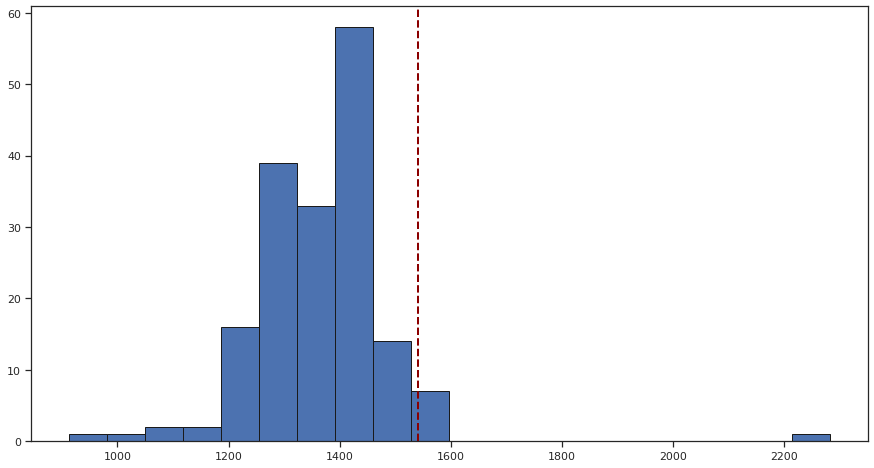

In [ ]:
# Visualiser la dispersion des données observées de ratio pour l'oeuf vs la valeur théorique
plt.figure(figsize=(15, 8))
plt.hist(aliments.query('Produit == "Oeufs"').ratio_energie_kcal_kg, edgecolor='k', bins=20) 
plt.axvline(1540, color='darkred', linestyle='dashed', linewidth=2)


## Question 5 : Aliments les plus caloriques et protéiques

###Citer 5 aliments parmi les 20 aliments les plus caloriques

In [ ]:
# Visualisation des 20 produits/pays les plus caloriques
aliments.sort_values('ratio_energie_kcal_kg', ascending = False)[:12][['Pays','Produit','ratio_energie_kcal_kg']]

,Pays,Produit,ratio_energie_kcal_kg
7802,République démocratique populaire lao,Miscellanees,inf
7202,Kirghizistan,Miscellanees,inf
1111,Bermudes,Miscellanees,inf
7862,Liban,Graines Colza/Moutarde,inf
7726,Lettonie,Miscellanees,inf
13198,"Chine, Taiwan Province de",Miscellanees,inf
7700,Lettonie,Graines Colza/Moutarde,inf
7635,Koweït,Miscellanees,inf
11113,Portugal,Graines Colza/Moutarde,inf
7609,Koweït,Graines Colza/Moutarde,inf


In [ ]:
# Quand la dispo alimentaire par kg est de 0, le ratio énergie/poids est infini.
# Exclusion des produits pour lesquels le ratio est infini
aliments.query('ratio_energie_kcal_kg != inf').sort_values('ratio_energie_kcal_kg', ascending = False)[:19][['Pays','Produit','ratio_energie_kcal_kg']]

,Pays,Produit,ratio_energie_kcal_kg
2426,Chili,Huil Plantes Oleif Autr,21900.0
5240,Guatemala,Huil Plantes Oleif Autr,18250.0
7521,République de Corée,Huile d'Arachide,18250.0
13747,Tunisie,Huile de Sésame,18250.0
8999,Mexique,Huile d'Arachide,18250.0
10931,Philippines,Huile d'Olive,18250.0
5982,Islande,Huile de Sésame,18250.0
11030,Pologne,Huile de Germe de Maïs,18250.0
7368,Cambodge,Huile d'Olive,18250.0
13644,Oman,Huile d'Arachide,18250.0


Parmi les 20 produits les plus riches en énergie, on retrouve principalement des huiles d'origine végétale. Le plus riche est l'huile de plantes oléifères "Autres" produite au Chili avec 21900 kcal/kg. 

Les produits suivants sont à égalité à 18250 kcal/kg. On y retrouve souvent l'huile de sésame, venant par exemple du Tunisie ou d'Islande, mais également l'huile d'arachide du Mexique ou les huiles de foie de poisson du Portugal.

Autre façon de procéder : on utilise un indicateur de position tel que la moyenne pour résumer l'information par produit

In [ ]:
# Résumé des variations de ratio énergie/poids pour chaque produit via la moyenne
aliments.query('ratio_energie_kcal_kg != inf').groupby('Produit')['ratio_energie_kcal_kg'].mean().sort_values(ascending = False)[:19]

Produit
Huile de Soja              8171.511170
Huile de Tournesol         7550.516606
Graisses Animales Crue     7535.719770
Huil Plantes Oleif Autr    6966.630805
Huile d'Olive              6955.920000
Beurre, Ghee               6826.515115
Huile de Germe de Maïs     6054.978616
Huile de Palme             5791.861000
Arachides Decortiquees     5369.860000
Huile de Coco              5348.515741
Huile de Son de Riz        5260.648571
Huile d'Arachide           5249.908970
Feve de Cacao              4318.074253
Huile de Colza&Moutarde    4316.020881
Huile Graines de Coton     4114.713057
Huile de Sésame            3964.356689
Riz (Eq Blanchi)           3640.608908
Sucre Eq Brut              3578.892126
Sésame                     3371.553086
Name: ratio_energie_kcal_kg, dtype: float64

Les résultats sont différents ici: on observe toujours peu de produits d'origine animale (seulement 2). Le plus riche en moyenne est l'huile de soja, alors que l'huile de plantes oléifères autres est en 4ème position. Des produits autres que des huiles sont présents, comme d'autres corps gras tel que le beurre et ghee, le sucre, ou le riz.

###Citer 5 aliments parmi les 20 aliments les plus riches en protéines
Besoin de calculer un ratio protéines / poids

In [ ]:
# Variable prot: dis_prot_kg_an (attention, ici kg de prot, pas de produit!)
# Variable poids: dispo_alim_kg_p_an => on doit multiplier par la population pour avoir la valeur pour le pays entier dispo_alim_kg_an
# donne un ratio en kg de prot/kg de produit

aliments["ratio_kg_prot_kg"] = round(aliments["dis_prot_kg_an"] / (aliments["dispo_alim_kg_p_an"] * aliments["population"] * 1000), 3)

# Visualisation de la table
#col_int.append('ratio_kg_prot_kg')
aliments.head()[['Pays','Produit','ratio_kg_prot_kg']]

,Pays,Produit,ratio_kg_prot_kg
0,Arménie,Abats Comestible,0.179
1,Arménie,"Agrumes, Autres",0.008
2,Arménie,"Alcool, non Comestible",NaN
3,Arménie,Aliments pour enfants,0.160
4,Arménie,Ananas,0.000


In [ ]:
# Vérification en comparaison avec l'oeuf
aliments.query('Produit == "Oeufs"').ratio_kg_prot_kg.describe()
# valeur théorique oeuf = 127g de prot/ 1 kg d'oeuf, on est un peu au dessus

count    174.000000
mean       0.106937
std        0.005343
min        0.097000
25%        0.104000
50%        0.107000
75%        0.112000
max        0.121000
Name: ratio_kg_prot_kg, dtype: float64

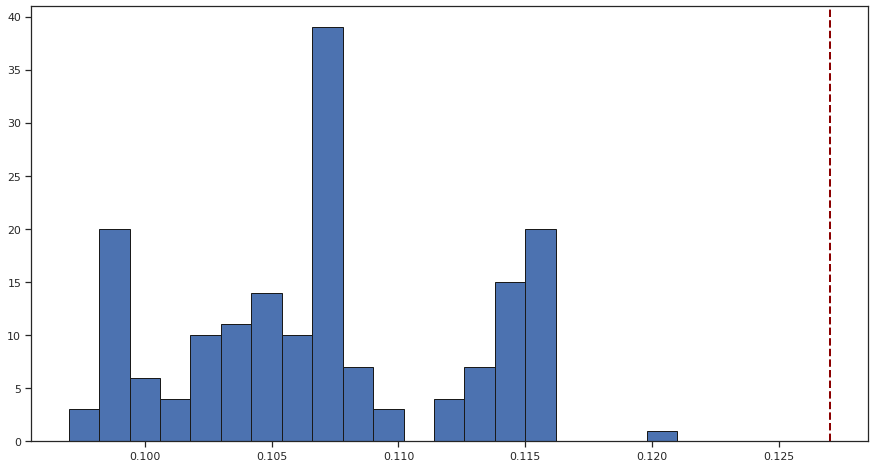

In [ ]:
# Visualiser la dispersion des données observées de ratio pour l'oeuf vs la valeur théorique
plt.figure(figsize=(15, 8))
plt.hist(aliments.query('Produit == "Oeufs"').ratio_kg_prot_kg, edgecolor='k', bins=20) 
plt.axvline(0.127, color='darkred', linestyle='dashed', linewidth=2)

In [ ]:
# Visualisation des 20 produits/pays les plus riches en protéines
aliments.query('ratio_kg_prot_kg != inf').sort_values('ratio_kg_prot_kg', ascending = False)[:19][['Pays','Produit','ratio_kg_prot_kg']]

,Pays,Produit,ratio_kg_prot_kg
9127,Mongolie,Poissons Pelagiques,0.426
1854,Myanmar,Soja,0.384
7044,Japon,Soja,0.381
14875,Éthiopie,Soja,0.381
13783,Tunisie,Soja,0.381
15137,Zambie,Soja,0.380
8404,Malawi,Soja,0.380
11304,Timor-Leste,Soja,0.380
14432,Burkina Faso,Soja,0.380
4848,Bosnie-Herzégovine,Soja,0.380


L'aliment le plus riche en protéine est les poissons pélagiques produits en Mongolie avec 426 g de protéines/kg de produit. Les autres produits du top 20 sont tous du soja, avec des richesses en protéines variables. Ces sojas sont issus de pays répartis sur tous les continents comme la Tunisie, la Tchéquie, le Malawi, le Japon ou le Costa Rica.

In [ ]:
# Résumé des variations de ratio énergie/poids pour chaque produit via la moyenne
aliments.query('ratio_kg_prot_kg != inf').groupby('Produit')['ratio_kg_prot_kg'].mean().sort_values(ascending = False)[:19]

Produit
Arachides Decortiquees      0.247910
Soja                        0.247534
Légumineuses Autres         0.220231
Pois                        0.219566
Haricots                    0.215720
Abats Comestible            0.176264
Viande, Autre               0.174018
Sésame                      0.173266
Plantes Oleiferes, Autre    0.155974
Aliments pour enfants       0.148710
Viande de Bovins            0.144615
Cephalopodes                0.140569
Viande d'Ovins/Caprins      0.137370
Viande de Volailles         0.126184
Poissons Pelagiques         0.121302
Piments                     0.109907
Graines Colza/Moutarde      0.109500
Poissons Marins, Autres     0.109388
Oeufs                       0.106937
Name: ratio_kg_prot_kg, dtype: float64

Ici aussi les résultats sont différents : le produit le plus riche en protéines en moyenne est les arachides décortiquées. Le soja, omniprésent à la question d'avant, se retrouve en 2ème position, suivi par Légumineuses Autres, Pois et Haricots, qui sont tous des légumineuses. On observe ainsi qu'en moyenne, les légumineuses contiennent plus de protéines que les produits d'origine animale qui apparaissent après. 

##Question 6 : Dispo. intérieure mondiale des végétaux

On a: 
- dispo intérieure par pays (en millier de tonnes => à convertir en kg (* 1 000 000) ) = colonne dispo_int

- ratio énergie poids (en kcal par kg)

On veut : 
- dispo intérieure (en kcal) 

Calcul à faire : disp int (en kcal) = dispo int (en kg) * ratio énergie poids (kcal/kg)

In [ ]:
# Rappel des noms de colonnes
aliments.columns

Index(['Code Pays', 'Pays', 'Produit', 'Code Produit', 'Année', 'Origine',
       'alim_ani', 'autres_utilisations', 'dispo_alim_kcal_p_j',
       'dispo_alim_kg_p_an', 'dispo_mat_gr', 'dispo_prot', 'dispo_int',
       'Exportations - Quantité', 'Importations - Quantité', 'nourriture',
       'pertes', 'Production', 'semences', 'transfo', 'Variation de stock',
       'Country Code', 'population', 'dis_alim_kcal_an', 'dis_prot_kg_an',
       'ratio_energie_kcal_kg', 'ratio_kg_prot_kg'],
      dtype='object')

In [ ]:
# Creation d'une colonne dispo intérieure en kcal 
aliments['disp_int_kcal_an'] = round((aliments["dispo_int"]*1e6) * aliments["ratio_energie_kcal_kg"], 3)

# remplacement des NaN
aliments.replace(np.nan, 0, inplace=True)

# Affichage des 10 premiers couples produits/pays
aliments.query('ratio_energie_kcal_kg != inf')[['Pays','Produit','disp_int_kcal_an']].sort_values('disp_int_kcal_an', ascending = False)[:9]

,Pays,Produit,disp_int_kcal_an
14314,États-Unis d'Amérique,Maïs,8.032192e+14
2538,"Chine, continentale",Maïs,6.192022e+14
2565,"Chine, continentale",Riz (Eq Blanchi),5.017607e+14
2498,"Chine, continentale",Blé,3.961112e+14
6110,Inde,Riz (Eq Blanchi),3.432776e+14
6043,Inde,Blé,2.691352e+14
2567,"Chine, continentale",Soja,2.620657e+14
1418,Brésil,"Sucre, canne",2.129828e+14
2578,"Chine, continentale",Viande de Suides,1.866873e+14


In [ ]:
# Statistiques univariées sur cette nouvelle variable
aliments.query('ratio_energie_kcal_kg != inf')['disp_int_kcal_an'].describe() 

count    1.540300e+04
mean     8.882351e+11
std      1.166167e+13
min     -6.314685e+11
25%      0.000000e+00
50%      5.209650e+09
75%      8.966165e+10
max      8.032192e+14
Name: disp_int_kcal_an, dtype: float64

In [ ]:
# Définition d'une variable contenant la somme des dispo intérieures en kcal par an pour les produits végétaux
dis_int_mond_veg_cal = aliments.query('ratio_energie_kcal_kg != inf').groupby('Origine').disp_int_kcal_an.sum()[1]
dis_int_mond_veg_cal

1.216641849449e+16

On a environ 12 000 miliards kcal de végétaux disponible par an à l'échelle mondiale.




## Question 7 : Potentiel alimentaire des végétaux

### Définition du besoin calorique par personne : 

On choisit arbitrairement la valeur de **2000 kcal** nécessaires par personne par jour. Cette valeur est comprise dans les estimations de la FAO pour différents types de personnes: https://www.fao.org/3/w0073f/w0073f43.pdf


In [ ]:
# Calcul du besoin en calories annuel mondial (on arrondi la population mondiale à 7 milliards) en kcal (donc *1000) 
besoin_cal_an = 2000 * 1000 * 365 * 7e9 
besoin_cal_an

5.11e+18

In [ ]:
# Dispo intérieure mondiale des végétaux en kcal, conversion en calories
dis_int_mond_veg_cal = dis_int_mond_veg_cal * 1000
dis_int_mond_veg_cal

1.216641849449e+19

In [ ]:
#dis_int_mond_veg_cal / 1000
1.216641849449e+16

1.216641849449e+16

In [ ]:
# % de la pop mondiale pouvant être nourrie par les produits végétaux disponibles
dis_int_mond_veg_cal * 100 / besoin_cal_an 

238.09038149686887

Environ 238% des besoins humains en kcal pourraient être couverts par les produits végétaux disponibles à l'échelle mondiale.

### Besoin protéique par personne
On choisit arbitrairement la valeur de **50 g de protéines** nécessaires par personne par jour. Cette valeur est comprise dans les estimations de la FAO pour différents types de personnes: https://www.fao.org/3/w0073f/w0073f43.pdf

**Avant tout, on doit calculer la disponibilité intérieure mondiale en protéines (similaire question 6).**

On a: 
- dispo intérieure par pays (en millier de tonnes => à convertir en kg (* 1 000 000) ) = colonne dispo_int

- ratio protéines / poids (en kg par kg) = colonne ratio_kg_prot_kg

On veut : 
- dispo intérieure (en kg) 

Calcul à faire : disp int prot (en kg) = dispo int (en kg) * ratio énergie protéines / poids (en kg par kg)

In [ ]:
# Creation d'une colonne dispo intérieure en kcal 
aliments['disp_int_prot_kg_an'] = round((aliments["dispo_int"]*1e6) * aliments["ratio_kg_prot_kg"], 3)

# remplacement des NaN
aliments.replace(np.nan, 0, inplace=True)

# Affichage des 10 premiers couples produits/pays
aliments.query('ratio_kg_prot_kg != inf')[['Pays','Produit','disp_int_prot_kg_an']].sort_values('disp_int_prot_kg_an', ascending = False)[:9]

,Pays,Produit,disp_int_prot_kg_an
2567,"Chine, continentale",Soja,2.462657e+10
14314,États-Unis d'Amérique,Maïs,1.463880e+10
2538,"Chine, continentale",Maïs,1.341887e+10
2498,"Chine, continentale",Blé,1.264995e+10
14343,États-Unis d'Amérique,Soja,9.586304e+09
2565,"Chine, continentale",Riz (Eq Blanchi),9.078476e+09
1414,Brésil,Soja,8.950210e+09
6043,Inde,Blé,7.859852e+09
2535,"Chine, continentale","Légumes, Autres",7.000980e+09


In [ ]:
# Statistiques univariées sur cette nouvelle variable
aliments.query('ratio_kg_prot_kg != inf')['disp_int_prot_kg_an'].describe() 

count    1.547000e+04
mean     2.477350e+07
std      3.456976e+08
min     -6.242600e+08
25%      0.000000e+00
50%      1.200000e+04
75%      1.490750e+06
max      2.462657e+10
Name: disp_int_prot_kg_an, dtype: float64

In [ ]:
# Somme des dispo intérieures en kcal par an selon l'origine des produits
dis_int_mond_veg_prot = aliments.query('ratio_kg_prot_kg != inf').groupby('Origine').disp_int_prot_kg_an.sum()[1]
dis_int_mond_veg_prot

292134727000.0

**Calcul à l'échelle mondiale**

In [ ]:
# Calcul du besoin en protéines annuel mondial (on arrondi la population mondiale à 7 milliards) en g de protéines = conversion en kg
besoin_prot_an = 50  * 365 * 7e9 * 1e-3
besoin_prot_an

127750000000.0

In [ ]:
# % de la pop mondiale pouvant être nourrie par les produits végétaux disponibles
dis_int_mond_veg_prot * 100 / besoin_prot_an 

228.67689001956947

Environ 228% des besoins humains en protéines pourraient être couverts par les produits végétaux disponibles à l'échelle mondiale.